In [89]:
# Import libraries
import matplotlib.pyplot as plt # Matplotlib is used for plotting
import pandas as pd             # Pandas helps organize data structures
import numpy as np              # Numpy provides mathematical functions like sqrt()
import statsmodels.formula.api as smf  # Statsmodel provides linear regression

import statsmodels.api as sm
from scipy.stats import pearsonr

from mpl_toolkits.mplot3d import Axes3D

In [4]:
data=pd.read_csv('DataCollection.csv')
data

,project_name,stars_count,popular/non-popular,language,domain,commits_count,Commits Count,Unnamed: 7,Change Set,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,NaN,NaN,NaN,NaN,NaN,NaN,commits_count_max,commits_count_avg,change_set_max,change_set_avg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Zinger,66.0,non-popular,Kotlin,Android,135.0,31,3,74,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ModuleCheck,5.0,non-popular,Kotlin,Android,270.0,80,5,147,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aves,87.0,non-popular,Dart,Android,1432.0,189,11,252,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VertexKit,40.0,non-popular,Swift,IOS,116.0,45,7,32,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data1 = data.head(17)
data1

,project_name,stars_count,popular/non-popular,language,domain,commits_count,Commits Count,Unnamed: 7,Change Set,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,NaN,NaN,NaN,NaN,NaN,NaN,commits_count_max,commits_count_avg,change_set_max,change_set_avg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Zinger,66.0,non-popular,Kotlin,Android,135.0,31,3,74,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ModuleCheck,5.0,non-popular,Kotlin,Android,270.0,80,5,147,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aves,87.0,non-popular,Dart,Android,1432.0,189,11,252,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VertexKit,40.0,non-popular,Swift,IOS,116.0,45,7,32,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Firefly,35.0,non-popular,Swift,IOS,166.0,144,7,116,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,EasyBudget,92.0,non-popular,Kotlin,Android,674.0,165,7,151,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cometchat,95.0,non-popular,Swift,IOS,196.0,5562,3,4333,151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Compass,70.0,non-popular,Swift,IOS,7.0,3,1,35,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AndroidUtilCode,30000.0,popular,Java,Android,1319.0,717,2,10418,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data2 = data1.iloc[1: , :]
data2

,project_name,stars_count,popular/non-popular,language,domain,commits_count,Commits Count,Unnamed: 7,Change Set,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
1,Zinger,66.0,non-popular,Kotlin,Android,135.0,31,3,74,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ModuleCheck,5.0,non-popular,Kotlin,Android,270.0,80,5,147,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aves,87.0,non-popular,Dart,Android,1432.0,189,11,252,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VertexKit,40.0,non-popular,Swift,IOS,116.0,45,7,32,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Firefly,35.0,non-popular,Swift,IOS,166.0,144,7,116,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,EasyBudget,92.0,non-popular,Kotlin,Android,674.0,165,7,151,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cometchat,95.0,non-popular,Swift,IOS,196.0,5562,3,4333,151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Compass,70.0,non-popular,Swift,IOS,7.0,3,1,35,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AndroidUtilCode,30000.0,popular,Java,Android,1319.0,717,2,10418,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,architecture-samples,39700.0,popular,Kotlin,Android,700.0,633,5,319,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data3 = data2[['stars_count', 'language', 'domain', 'commits_count']]
data3

,stars_count,language,domain,commits_count
1,66.0,Kotlin,Android,135.0
2,5.0,Kotlin,Android,270.0
3,87.0,Dart,Android,1432.0
4,40.0,Swift,IOS,116.0
5,35.0,Swift,IOS,166.0
6,92.0,Kotlin,Android,674.0
7,95.0,Swift,IOS,196.0
8,70.0,Swift,IOS,7.0
9,30000.0,Java,Android,1319.0
10,39700.0,Kotlin,Android,700.0


In [11]:
lang_count = data3.groupby('language').size()
lang_count

language
C         1
Dart      1
Java      2
Kotlin    5
Swift     7
dtype: int64

In [12]:
type(lang_count)

pandas.core.series.Series

<AxesSubplot:xlabel='language'>

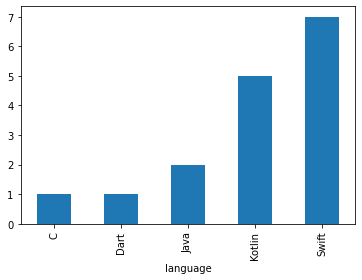

In [13]:
lang_count.plot.bar()

In [16]:
reg_commit = smf.ols('stars_count ~ 1 + commits_count', data=data3).fit()
reg_commit.summary()

/Users/chufanyang/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            stars_count   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.057
Method:                 Least Squares   F-statistic:                    0.1856
Date:                Tue, 09 Nov 2021   Prob (F-statistic):              0.673
Time:                        23:59:44   Log-Likelihood:                -172.90
No. Observations:                  16   AIC:                             349.8
Df Residuals:                      14   BIC:                             351.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5642.8673   3611.746      1.562      0.141   -2103.558    1.34e+04
commits_count     0.5970      1.386      0.431      0.673      -2.375       3.569
==============================================================================
Omnibus:                       15.227   Durbin-Watson:                   0.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.116
Skew:                           1.872   Prob(JB):                      0.00234
Kurtosis:                       5.037   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

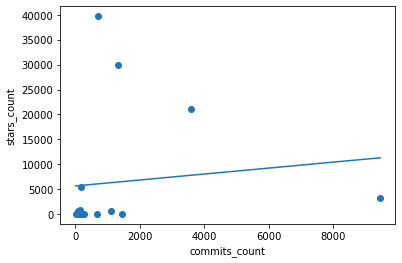

In [68]:
beta0, beta1 = reg_commit.params.Intercept, reg_commit.params.commits_count
x = data3['commits_count'].sort_values()
y = beta0 + beta1*x 

fig, ax = plt.subplots()
ax.scatter(data3['commits_count'], data3['stars_count'])
ax.set_xlabel('commits_count')
ax.set_ylabel('stars_count')

ax.plot(x, y)

plt.show()

In [32]:
data_new = sm.add_constant(data3[['commits_count']])
y_hat = reg_commit.predict(data_new)
corr, p = pearsonr(data3['stars_count'], y_hat)
print(corr)

0.11437646984352906


In [15]:
reg_domain = smf.ols('stars_count ~ 1 + domain', data=data3).fit()
reg_domain.summary()

/Users/chufanyang/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            stars_count   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.8393
Date:                Mon, 08 Nov 2021   Prob (F-statistic):              0.375
Time:                        01:53:30   Log-Likelihood:                -172.54
No. Observations:                  16   AIC:                             349.1
Df Residuals:                      14   BIC:                             350.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9229.8750   4410.504      2.093      0.055    -229.716    1.87e+04
domain[T.IOS] -5714.3750   6237.395     -0.916      0.375   -1.91e+04    7663.506
==============================================================================
Omnibus:                        9.905   Durbin-Watson:                   0.594
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.730
Skew:                           1.513   Prob(JB):                       0.0346
Kurtosis:                       3.968   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
data4 = data3.head(8)
data4

,stars_count,language,domain,commits_count
1,66.0,Kotlin,Android,135.0
2,5.0,Kotlin,Android,270.0
3,87.0,Dart,Android,1432.0
4,40.0,Swift,IOS,116.0
5,35.0,Swift,IOS,166.0
6,92.0,Kotlin,Android,674.0
7,95.0,Swift,IOS,196.0
8,70.0,Swift,IOS,7.0


In [23]:
dom_count_np = data4.groupby('domain').size()
dom_count_np

domain
Android    4
IOS        4
dtype: int64

<AxesSubplot:xlabel='domain'>

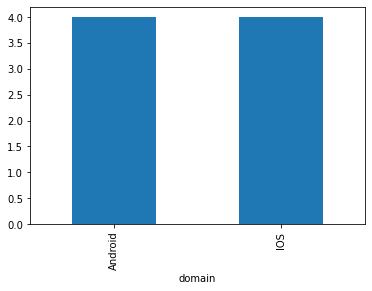

In [24]:
dom_count_np.plot.bar()

In [22]:
data5 = data3.tail(8)
data5

,stars_count,language,domain,commits_count
9,30000.0,Java,Android,1319.0
10,39700.0,Kotlin,Android,700.0
11,21000.0,Swift,IOS,3596.0
12,5500.0,Swift,IOS,173.0
13,3200.0,Kotlin,Android,9462.0
14,569.0,Swift,IOS,67.0
15,815.0,C,IOS,128.0
16,689.0,Java,Android,1118.0


In [25]:
dom_count_p = data5.groupby('domain').size()
dom_count_p

domain
Android    4
IOS        4
dtype: int64

<AxesSubplot:xlabel='domain'>

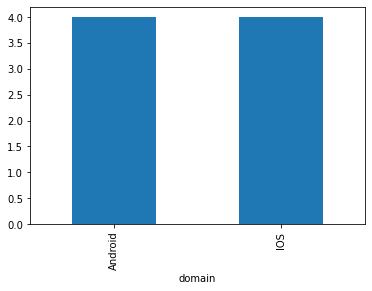

In [26]:
dom_count_p.plot.bar()

In [12]:
data3['contributors_count'] = data2.iloc[:,10]
data3['minor_contributors'] = data2.iloc[:,11]
data3

<ipython-input-12-79b8ae941a54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['contributors_count'] = data2.iloc[:,10]
<ipython-input-12-79b8ae941a54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['minor_contributors'] = data2.iloc[:,11]


,stars_count,language,domain,commits_count,contributors_count,minor_contributors
1,66.0,Kotlin,Android,135.0,2,1
2,5.0,Kotlin,Android,270.0,4,2
3,87.0,Dart,Android,1432.0,4,3
4,40.0,Swift,IOS,116.0,3,1
5,35.0,Swift,IOS,166.0,4,3
6,92.0,Kotlin,Android,674.0,2,1
7,95.0,Swift,IOS,196.0,9,4
8,70.0,Swift,IOS,7.0,1,0
9,30000.0,Java,Android,1319.0,6,5
10,39700.0,Kotlin,Android,700.0,26,23


In [14]:
data3['contributors_count'] = pd.to_numeric(data3['contributors_count'])
data3['minor_contributors'] = pd.to_numeric(data3['minor_contributors'])
data3['normal_contributors'] = data3['contributors_count'] - data3['minor_contributors']
data3

<ipython-input-14-678d9c68480e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['contributors_count'] = pd.to_numeric(data3['contributors_count'])
<ipython-input-14-678d9c68480e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['minor_contributors'] = pd.to_numeric(data3['minor_contributors'])
<ipython-input-14-678d9c68480e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,stars_count,language,domain,commits_count,contributors_count,minor_contributors,normal_contributors
1,66.0,Kotlin,Android,135.0,2,1,1
2,5.0,Kotlin,Android,270.0,4,2,2
3,87.0,Dart,Android,1432.0,4,3,1
4,40.0,Swift,IOS,116.0,3,1,2
5,35.0,Swift,IOS,166.0,4,3,1
6,92.0,Kotlin,Android,674.0,2,1,1
7,95.0,Swift,IOS,196.0,9,4,5
8,70.0,Swift,IOS,7.0,1,0,1
9,30000.0,Java,Android,1319.0,6,5,1
10,39700.0,Kotlin,Android,700.0,26,23,3


In [15]:
reg_ctrb = smf.ols('stars_count ~ 1 + minor_contributors + normal_contributors', data=data3).fit()
reg_ctrb.summary()

/Users/chufanyang/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            stars_count   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1.778
Date:                Tue, 09 Nov 2021   Prob (F-statistic):              0.208
Time:                        23:46:59   Log-Likelihood:                -171.07
No. Observations:                  16   AIC:                             348.1
Df Residuals:                      13   BIC:                             350.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4916.7386   5322.249      0.924      0.372   -6581.280    1.64e+04
minor_contributors    333.1373    177.813      1.874      0.084     -51.004     717.279
normal_contributors -1191.9585   2096.540     -0.569      0.579   -5721.259    3337.342
==============================================================================
Omnibus:                       20.258   Durbin-Watson:                   1.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.461
Skew:                           2.195   Prob(JB):                     5.95e-05
Kurtosis:                       6.151   Cond. No.                         38.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

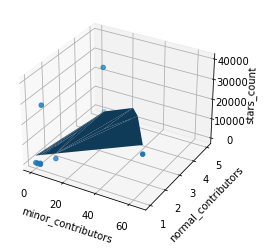

In [139]:
data_new2 = sm.add_constant(data3[['minor_contributors', 'normal_contributors']])
y_hat2 = reg_ctrb.predict(data_new2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data3['minor_contributors'], data3['normal_contributors'], data3['stars_count'])
#ax.plot(data3['minor_contributors'], data3['normal_contributors'], y_hat2)
ax.plot_trisurf(data3['minor_contributors'], data3['normal_contributors'], y_hat2)
ax.set_xlabel('minor_contributors')
ax.set_ylabel('normal_contributors')
ax.set_zlabel('stars_count')
plt.show()

In [105]:
corr, p = pearsonr(data3['stars_count'], y_hat2)
print(corr)

0.4634515399622514


In [29]:
data6=pd.read_csv('DataCollection2.csv')
data6 = data6.head(17)
data6 = data6.iloc[1: , :]

In [30]:
data6

,project_name,stars_count,popular/non-popular,language,domain,commits_count_total,Commits Count per File,Unnamed: 7,Change Set,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
1,Zinger,66.0,non-popular,Kotlin,Android,135.0,31,3,74,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ModuleCheck,5.0,non-popular,Kotlin,Android,270.0,80,5,147,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aves,87.0,non-popular,Dart,Android,1432.0,189,11,252,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VertexKit,40.0,non-popular,Swift,IOS,116.0,45,7,32,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Firefly,35.0,non-popular,Swift,IOS,166.0,144,7,116,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,EasyBudget,92.0,non-popular,Kotlin,Android,674.0,165,7,151,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cometchat,95.0,non-popular,Swift,IOS,196.0,5562,3,4333,151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Compass,70.0,non-popular,Swift,IOS,7.0,3,1,35,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AndroidUtilCode,30000.0,popular,Java,Android,1319.0,717,2,10418,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,architecture-samples,39700.0,popular,Kotlin,Android,700.0,633,5,319,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data3['year'] = data6.iloc[:,21]
data3

<ipython-input-33-f18181524195>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['year'] = data6.iloc[:,21]


,stars_count,language,domain,commits_count,contributors_count,minor_contributors,normal_contributors,year
1,66.0,Kotlin,Android,135.0,2,1,1,2020-02-15
2,5.0,Kotlin,Android,270.0,4,2,2,2020-11-28
3,87.0,Dart,Android,1432.0,4,3,1,2019-08-04
4,40.0,Swift,IOS,116.0,3,1,2,2018-08-03
5,35.0,Swift,IOS,166.0,4,3,1,2019-08-04
6,92.0,Kotlin,Android,674.0,2,1,1,2014-12-27
7,95.0,Swift,IOS,196.0,9,4,5,2018-12-04
8,70.0,Swift,IOS,7.0,1,0,1,2017-04-29
9,30000.0,Java,Android,1319.0,6,5,1,2016-07-30
10,39700.0,Kotlin,Android,700.0,26,23,3,2016-02-05


In [42]:
data3['year'] = data3['year'].str.split('-').str[0]
data3

<ipython-input-42-d938df33987d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['year'] = data3['year'].str.split('-').str[0]


,stars_count,language,domain,commits_count,contributors_count,minor_contributors,normal_contributors,year
1,66.0,Kotlin,Android,135.0,2,1,1,2020
2,5.0,Kotlin,Android,270.0,4,2,2,2020
3,87.0,Dart,Android,1432.0,4,3,1,2019
4,40.0,Swift,IOS,116.0,3,1,2,2018
5,35.0,Swift,IOS,166.0,4,3,1,2019
6,92.0,Kotlin,Android,674.0,2,1,1,2014
7,95.0,Swift,IOS,196.0,9,4,5,2018
8,70.0,Swift,IOS,7.0,1,0,1,2017
9,30000.0,Java,Android,1319.0,6,5,1,2016
10,39700.0,Kotlin,Android,700.0,26,23,3,2016


In [43]:
data3_p = data3.tail(8)
data3_p

,stars_count,language,domain,commits_count,contributors_count,minor_contributors,normal_contributors,year
9,30000.0,Java,Android,1319.0,6,5,1,2016
10,39700.0,Kotlin,Android,700.0,26,23,3,2016
11,21000.0,Swift,IOS,3596.0,66,65,1,2015
12,5500.0,Swift,IOS,173.0,14,13,1,2018
13,3200.0,Kotlin,Android,9462.0,39,35,4,2012
14,569.0,Swift,IOS,67.0,4,3,1,2018
15,815.0,C,IOS,128.0,9,6,3,2013
16,689.0,Java,Android,1118.0,28,23,5,2015


In [44]:
data3_np = data3.head(8)
data3_np

,stars_count,language,domain,commits_count,contributors_count,minor_contributors,normal_contributors,year
1,66.0,Kotlin,Android,135.0,2,1,1,2020
2,5.0,Kotlin,Android,270.0,4,2,2,2020
3,87.0,Dart,Android,1432.0,4,3,1,2019
4,40.0,Swift,IOS,116.0,3,1,2,2018
5,35.0,Swift,IOS,166.0,4,3,1,2019
6,92.0,Kotlin,Android,674.0,2,1,1,2014
7,95.0,Swift,IOS,196.0,9,4,5,2018
8,70.0,Swift,IOS,7.0,1,0,1,2017


In [45]:
reg_ctrb_p = smf.ols('stars_count ~ 1 + minor_contributors + normal_contributors', data=data3_p).fit()
reg_ctrb_p.summary()

/Users/chufanyang/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            stars_count   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                 -0.235
Method:                 Least Squares   F-statistic:                    0.3347
Date:                Wed, 10 Nov 2021   Prob (F-statistic):              0.730
Time:                        01:58:49   Log-Likelihood:                -87.480
No. Observations:                   8   AIC:                             181.0
Df Residuals:                       5   BIC:                             181.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.568e+04   1.29e+04      1.214      0.279   -1.75e+04    4.89e+04
minor_contributors    161.8662    314.083      0.515      0.628    -645.509     969.241
normal_contributors -2736.2984   4072.925     -0.672      0.531   -1.32e+04    7733.489
==============================================================================
Omnibus:                        4.464   Durbin-Watson:                   0.835
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                1.843
Skew:                           1.173   Prob(JB):                        0.398
Kurtosis:                       2.841   Cond. No.                         63.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

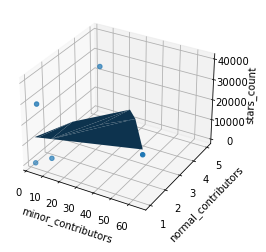

In [108]:
data_new3 = sm.add_constant(data3_p[['minor_contributors', 'normal_contributors']])
y_hat3 = reg_ctrb_p.predict(data_new3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data3_p['minor_contributors'], data3_p['normal_contributors'], data3_p['stars_count'])
#ax.plot(data3_p['minor_contributors'], data3_p['normal_contributors'], y_hat3)
ax.plot_trisurf(data3_p['minor_contributors'], data3_p['normal_contributors'], y_hat3)
ax.set_xlabel('minor_contributors')
ax.set_ylabel('normal_contributors')
ax.set_zlabel('stars_count')
plt.show()

In [110]:
corr, p = pearsonr(data3_p['stars_count'], y_hat3)
print(corr)

0.3436265333788196


In [47]:
reg_ctrb_np = smf.ols('stars_count ~ 1 + minor_contributors + normal_contributors', data=data3_np).fit()
reg_ctrb_np.summary()

/Users/chufanyang/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            stars_count   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.352
Method:                 Least Squares   F-statistic:                   0.08887
Date:                Wed, 10 Nov 2021   Prob (F-statistic):              0.916
Time:                        02:03:47   Log-Likelihood:                -38.394
No. Observations:                   8   AIC:                             82.79
Df Residuals:                       5   BIC:                             83.03
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              53.5648     24.701      2.168      0.082      -9.932     117.062
minor_contributors      0.2659     12.803      0.021      0.984     -32.646      33.178
normal_contributors     4.1066     12.503      0.328      0.756     -28.034      36.247
==============================================================================
Omnibus:                        1.318   Durbin-Watson:                   2.573
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                0.804
Skew:                          -0.685   Prob(JB):                        0.669
Kurtosis:                       2.268   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

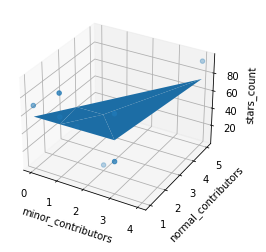

In [109]:
data_new4 = sm.add_constant(data3_np[['minor_contributors', 'normal_contributors']])
y_hat4 = reg_ctrb_np.predict(data_new4)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data3_np['minor_contributors'], data3_np['normal_contributors'], data3_np['stars_count'])
#ax.plot(data3_np['minor_contributors'], data3_np['normal_contributors'], y_hat4)
ax.plot_trisurf(data3_np['minor_contributors'], data3_np['normal_contributors'], y_hat4)
ax.set_xlabel('minor_contributors')
ax.set_ylabel('normal_contributors')
ax.set_zlabel('stars_count')
plt.show()

In [111]:
corr, p = pearsonr(data3_np['stars_count'], y_hat4)
print(corr)

0.1852806615407477


In [49]:
reg_commit_p = smf.ols('stars_count ~ 1 + commits_count', data=data3_p).fit()
reg_commit_p.summary()

/Users/chufanyang/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            stars_count   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.155
Method:                 Least Squares   F-statistic:                   0.06219
Date:                Wed, 10 Nov 2021   Prob (F-statistic):              0.811
Time:                        02:10:14   Log-Likelihood:                -87.942
No. Observations:                   8   AIC:                             179.9
Df Residuals:                       6   BIC:                             180.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.37e+04   7138.847      1.919      0.103   -3771.375    3.12e+04
commits_count    -0.4891      1.961     -0.249      0.811      -5.288       4.310
==============================================================================
Omnibus:                        1.672   Durbin-Watson:                   0.447
Prob(Omnibus):                  0.433   Jarque-Bera (JB):                1.060
Skew:                           0.709   Prob(JB):                        0.589
Kurtosis:                       1.920   Cond. No.                     4.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

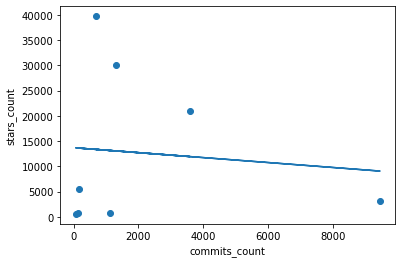

In [50]:
data_new5 = sm.add_constant(data3_p[['commits_count']])
y_hat5 = reg_commit_p.predict(data_new5)

x = data3_p['commits_count']

fig, ax = plt.subplots()
ax.scatter(data3_p['commits_count'], data3_p['stars_count'])
ax.set_xlabel('commits_count')
ax.set_ylabel('stars_count')

ax.plot(x, y_hat5)

plt.show()

In [51]:
reg_commit_np = smf.ols('stars_count ~ 1 + commits_count', data=data3_np).fit()
reg_commit_np.summary()

/Users/chufanyang/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            stars_count   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.192
Date:                Wed, 10 Nov 2021   Prob (F-statistic):              0.317
Time:                        02:14:30   Log-Likelihood:                -37.809
No. Observations:                   8   AIC:                             79.62
Df Residuals:                       6   BIC:                             79.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        50.9065     14.631      3.479      0.013      15.105      86.708
commits_count     0.0276      0.025      1.092      0.317      -0.034       0.090
==============================================================================
Omnibus:                        0.914   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.467
Skew:                          -0.528   Prob(JB):                        0.792
Kurtosis:                       2.464   Cond. No.                         759.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

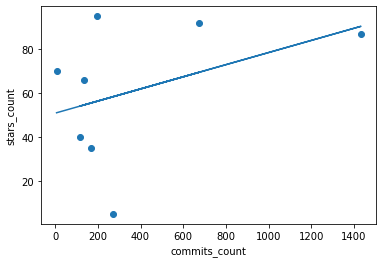

In [78]:
data_new6 = sm.add_constant(data3_np[['commits_count']])
y_hat6 = reg_commit_np.predict(data_new6)

x = data3_np['commits_count']

fig, ax = plt.subplots()
ax.scatter(data3_np['commits_count'], data3_np['stars_count'])
ax.set_xlabel('commits_count')
ax.set_ylabel('stars_count')

ax.plot(x, y_hat6)

plt.show()

In [115]:
year_2012 = data3_p[data3_p['year'] == '2012']
year_2012

,stars_count,language,domain,commits_count,contributors_count,minor_contributors,normal_contributors,year
13,3200.0,Kotlin,Android,9462.0,39,35,4,2012


In [119]:
lang_count_12 = year_2012.groupby('language').size()
lang_count_12

language
Kotlin    1
dtype: int64

Text(0.5, 1.0, '2012')

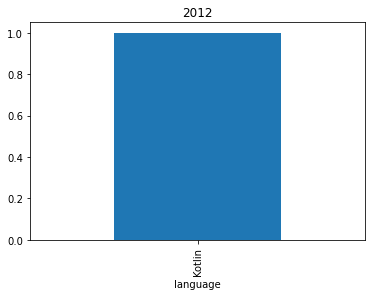

In [132]:
lang_count_12.plot.bar()
plt.title('2012')

In [123]:
year_2013 = data3_p[data3_p['year'] == '2013']
year_2013

,stars_count,language,domain,commits_count,contributors_count,minor_contributors,normal_contributors,year
15,815.0,C,IOS,128.0,9,6,3,2013


In [124]:
lang_count_13 = year_2013.groupby('language').size()
lang_count_13

language
C    1
dtype: int64

Text(0.5, 1.0, '2013')

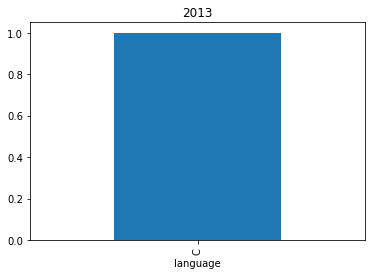

In [133]:
lang_count_13.plot.bar()
plt.title('2013')

In [117]:
year_2015 = data3_p[data3_p['year'] == '2015']
year_2015

,stars_count,language,domain,commits_count,contributors_count,minor_contributors,normal_contributors,year
11,21000.0,Swift,IOS,3596.0,66,65,1,2015
16,689.0,Java,Android,1118.0,28,23,5,2015


In [120]:
lang_count_15 = year_2015.groupby('language').size()
lang_count_15

language
Java     1
Swift    1
dtype: int64

Text(0.5, 1.0, '2015')

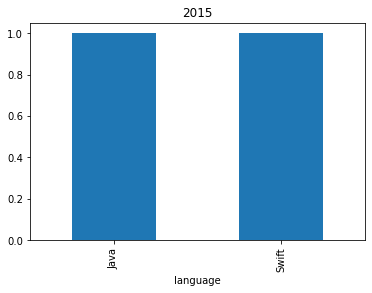

In [134]:
lang_count_15.plot.bar()
plt.title('2015')

In [126]:
year_2016 = data3_p[data3_p['year'] == '2016']
year_2016

,stars_count,language,domain,commits_count,contributors_count,minor_contributors,normal_contributors,year
9,30000.0,Java,Android,1319.0,6,5,1,2016
10,39700.0,Kotlin,Android,700.0,26,23,3,2016


In [130]:
lang_count_16 = year_2016.groupby('language').size()
lang_count_16

language
Java      1
Kotlin    1
dtype: int64

Text(0.5, 1.0, '2016')

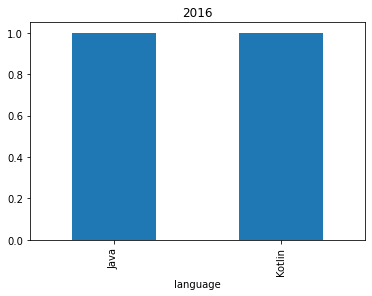

In [135]:
lang_count_16.plot.bar()
plt.title('2016')

In [129]:
year_2018 = data3_p[data3_p['year'] == '2018']
year_2018

,stars_count,language,domain,commits_count,contributors_count,minor_contributors,normal_contributors,year
12,5500.0,Swift,IOS,173.0,14,13,1,2018
14,569.0,Swift,IOS,67.0,4,3,1,2018


In [136]:
lang_count_18 = year_2018.groupby('language').size()
lang_count_18

language
Swift    2
dtype: int64

Text(0.5, 1.0, '2018')

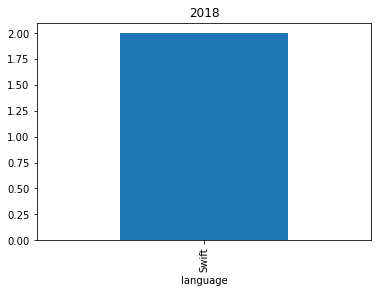

In [137]:
lang_count_18.plot.bar()
plt.title('2018')